In [3]:
# combine p7 with p11
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
import pandas as pd
import numpy as np

In [4]:
# import total traffic over all the provinces
# tf stands for total traffic
tf = pd.read_csv('주말전국총교통량.csv',encoding='utf-8')
tf.head()

,Unnamed: 0,0
0,경기도,1071407.25
1,경상남도,477730.00
2,충청남도,337147.75
3,충청북도,163838.50
4,대전광역시,127262.75


In [5]:
tf = tf.rename(columns={'Unnamed: 0':'name','0':'totalTraffic'})
tf

,name,totalTraffic
0,경기도,1071407.25
1,경상남도,477730.00
2,충청남도,337147.75
3,충청북도,163838.50
4,대전광역시,127262.75
5,경상북도,273611.00
6,대구광역시,266544.25
7,울산광역시,87951.50
8,부산광역시,203244.25
9,전라북도,117714.75


In [6]:
# 경기도 seems to consist of 경기도, 인천광역시, and 서울특별시
# change its name to avoid misunderstanding
tf['name'][0] = '경인·서울'
tf.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_21184\626290483.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tf['name'][0] = '경인·서울'
C:\Users\syj43\AppData\Local\Temp\ipykernel_21184\626290483.py:3: SettingWithCopyWarning: 
A value is try

,name,totalTraffic
0,경인·서울,1071407.25
1,경상남도,477730.00
2,충청남도,337147.75
3,충청북도,163838.50
4,대전광역시,127262.75


In [7]:
tf['totalTraffic']/1000

0     1071.40725
1      477.73000
2      337.14775
3      163.83850
4      127.26275
5      273.61100
6      266.54425
7       87.95150
8      203.24425
9      117.71475
10     185.30525
11     189.01100
12      60.99025
13      18.50575
Name: totalTraffic, dtype: float64

In [8]:
# add font - my choice is Binggrea font! :D
import matplotlib.font_manager as fm
# fm.fontManager.addfont('BinggraeII-Bold.ttf')
fm.fontManager.addfont('BinggraeII.ttf')

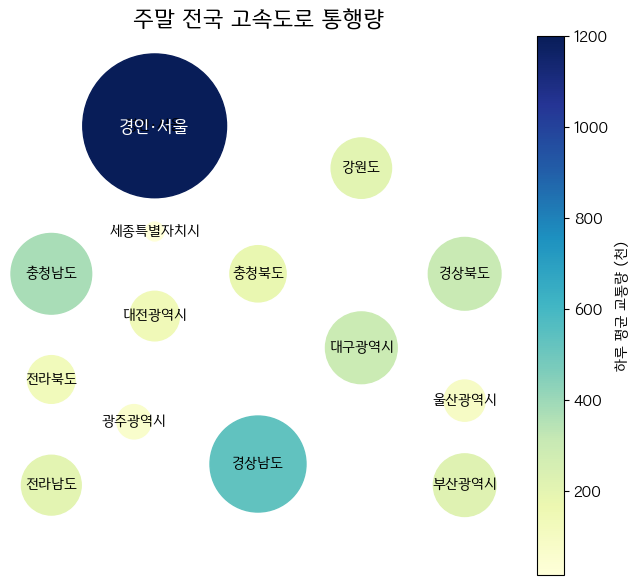

In [10]:
# draw nodes only
fig, ax = plt.subplots(1,1,figsize=(8,7))
mpl.rcParams["font.family"] = 'Binggrae?'
cmapTraffic = plt.cm.YlGnBu

# network
G = nx.Graph()
G.add_nodes_from(tf['name'])
# reflect real location
pos = {'경인·서울':(250,1000),'경상남도':(350,200),'충청남도':(150,650),'충청북도':(350,650),'대전광역시':(250,550),
       '울산광역시':(550,350),'부산광역시':(550,150),'전라북도':(150,400),'전라남도':(150,150),'강원도':(450,900),
       '광주광역시':(230,300),'세종특별자치시':(250,750),'경상북도':(550,650),'대구광역시':(450,475)}
nx.draw_networkx(G, with_labels=True, pos=pos, ax=ax, font_size=10, node_size=tf['totalTraffic']/100, 
                 font_family='Binggrae?', node_color=tf['totalTraffic']/100, cmap=cmapTraffic)
# add color bars
norm = mpl.colors.Normalize(vmin=15, vmax=1200)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
             ax=ax, orientation='vertical', label='하루 평균 교통량 (천)')

# add textboxes
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 12, "fontweight": "extra bold"}
ax.text(
    0.29,
    0.82,
    "경인·서울",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# remove the frame from the fig
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
plt.title('주말 전국 고속도로 통행량', fontsize=16)
plt.margins(0.1,0.25)
plt.show()

In [10]:
fig.savefig('주말전국고속도통행량.png')

In [11]:
# difference between weekdays and weekend
dfWeekday = pd.read_csv('평일전국통행량수정.csv')
dfWeekend = tf.copy()

In [12]:
dfWeekday

,Unnamed: 0,name,totalTraffic
0,0,경인·서울,1218374.00
1,1,경상남도,513050.75
2,2,충청남도,311984.75
3,3,충청북도,171887.00
4,4,대전광역시,134193.75
5,5,경상북도,269104.25
6,6,대구광역시,296553.50
7,7,울산광역시,88068.00
8,8,부산광역시,207509.00
9,9,전라북도,103599.50


In [13]:
dfWeekday = dfWeekday.drop('Unnamed: 0', axis=1)

In [14]:
dfWeekday = dfWeekday.rename(columns={'totalTraffic':'weekdayTraffic'})

In [15]:
dfWeekend

,name,totalTraffic
0,경인·서울,1071407.25
1,경상남도,477730.00
2,충청남도,337147.75
3,충청북도,163838.50
4,대전광역시,127262.75
5,경상북도,273611.00
6,대구광역시,266544.25
7,울산광역시,87951.50
8,부산광역시,203244.25
9,전라북도,117714.75


In [16]:
dfWeekend = dfWeekend.rename(columns={'totalTraffic':'weekendTraffic'})

In [17]:
diff = pd.merge(dfWeekday, dfWeekend, on='name')
diff.head()

,name,weekdayTraffic,weekendTraffic
0,경인·서울,1218374.00,1071407.25
1,경상남도,513050.75,477730.00
2,충청남도,311984.75,337147.75
3,충청북도,171887.00,163838.50
4,대전광역시,134193.75,127262.75


In [18]:
diff['trafficDiff'] = diff['weekdayTraffic'].values - diff['weekendTraffic'].values
diff.head()

,name,weekdayTraffic,weekendTraffic,trafficDiff
0,경인·서울,1218374.00,1071407.25,146966.75
1,경상남도,513050.75,477730.00,35320.75
2,충청남도,311984.75,337147.75,-25163.00
3,충청북도,171887.00,163838.50,8048.50
4,대전광역시,134193.75,127262.75,6931.00


In [19]:
diff = diff.sort_values(by='trafficDiff')

In [20]:
diff.sort_values(by='trafficDiff')

,name,weekdayTraffic,weekendTraffic,trafficDiff
11,강원도,154358.25,189011.00,-34652.75
2,충청남도,311984.75,337147.75,-25163.00
9,전라북도,103599.50,117714.75,-14115.25
10,전라남도,171310.00,185305.25,-13995.25
5,경상북도,269104.25,273611.00,-4506.75
13,세종특별자치시,16165.75,18505.75,-2340.00
12,광주광역시,60124.25,60990.25,-866.00
7,울산광역시,88068.00,87951.50,116.50
8,부산광역시,207509.00,203244.25,4264.75
4,대전광역시,134193.75,127262.75,6931.00


In [21]:
# node_color seems to get positive values only
diff['PositiveTD'] = diff['weekendTraffic'].apply(lambda x:x+34652.75)
diff

,name,weekdayTraffic,weekendTraffic,trafficDiff,PositiveTD
11,강원도,154358.25,189011.00,-34652.75,223663.75
2,충청남도,311984.75,337147.75,-25163.00,371800.50
9,전라북도,103599.50,117714.75,-14115.25,152367.50
10,전라남도,171310.00,185305.25,-13995.25,219958.00
5,경상북도,269104.25,273611.00,-4506.75,308263.75
13,세종특별자치시,16165.75,18505.75,-2340.00,53158.50
12,광주광역시,60124.25,60990.25,-866.00,95643.00
7,울산광역시,88068.00,87951.50,116.50,122604.25
8,부산광역시,207509.00,203244.25,4264.75,237897.00
4,대전광역시,134193.75,127262.75,6931.00,161915.50


In [22]:
trafficDiff = ((diff['trafficDiff']/1000).values).tolist()
trafficDiff

[-34.65275,
 -25.163,
 -14.11525,
 -13.99525,
 -4.50675,
 -2.34,
 -0.866,
 0.1165,
 4.26475,
 6.931,
 8.0485,
 30.00925,
 35.32075,
 146.96675]

In [23]:
# absolute values of the elements
trafficDiffAbs = [abs(ele) for ele in trafficDiff]
trafficDiffAbs

[34.65275,
 25.163,
 14.11525,
 13.99525,
 4.50675,
 2.34,
 0.866,
 0.1165,
 4.26475,
 6.931,
 8.0485,
 30.00925,
 35.32075,
 146.96675]

In [ ]:
### check its distribution

In [24]:
import matplotlib.font_manager as fm
# fm.fontManager.addfont('BinggraeII-Bold.ttf')
fm.fontManager.addfont('BinggraeII.ttf')

In [27]:
fpaths = fm.findSystemFonts()

for i in fpaths:
    f = fm.get_font(i)
    print(f.family_name)

Modern No. 20
Bookman Old Style
Dubai
Viner Hand ITC
Hancom Gothic
Georgia
Playbill
Ravie
Tw Cen MT
Franklin Gothic Medium
Curlz MT
Rockwell Condensed
Sitka
Lucida Calligraphy
Bradley Hand ITC
Webdings
Han Santteut Dotum
Californian FB
Tw Cen MT
Perpetua
Arial
Forte
MS Gothic
Binggrae?
Segoe Print
HYPost-Medium
Segoe UI
SimSun
Symbol
Lucida Console
Bell MT
Gill Sans MT Condensed
Mongolian Baiti
Gulim
Constantia
Vivaldi
Candara
Nirmala UI
Microsoft New Tai Lue
Script MT Bold
Footlight MT Light
Century Gothic
Cambria
Arial
Bell MT
Tw Cen MT Condensed Extra Bold
Ebrima
Perpetua
Courier New
Yu Gothic
Rockwell
Bodoni MT
Jokerman
Monotype Corsiva
HyhwpEQ
Yu Gothic
Eras Light ITC
Segoe Fluent Icons
Wingdings 2
HCR Batang ExtB
Lucida Sans
Han Santteut Dotum
Lucida Fax
Comic Sans MS
Impact
Papyrus
Comic Sans MS
Mistral
Corbel
Vladimir Script
Constantia
Baskerville Old Face
Century Schoolbook
Lucida Bright
HYPost-Light
Cooper Black
Palatino Linotype
Segoe UI
Comic Sans MS
Malgun Gothic
Corbel
Ca

C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Binggrae?.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Binggrae?.
  fig.canvas.print_figure(bytes_io, **kw)


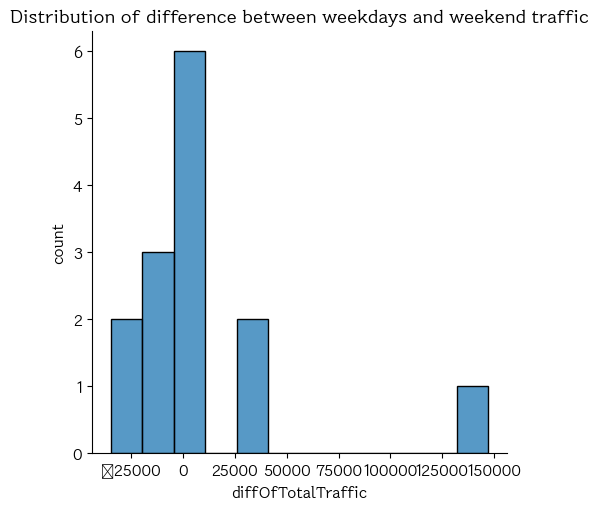

In [29]:
import seaborn as sns
mpl.rcParams["font.family"] = 'Binggrae?'
sns.displot(diff['trafficDiff'])
plt.xlabel('diffOfTotalTraffic')
plt.ylabel('count')
plt.title('Distribution of difference between weekdays and weekend traffic')
plt.show() # ~ normalized

In [32]:
fm.fontManager.addfont('BATANG.TTC')

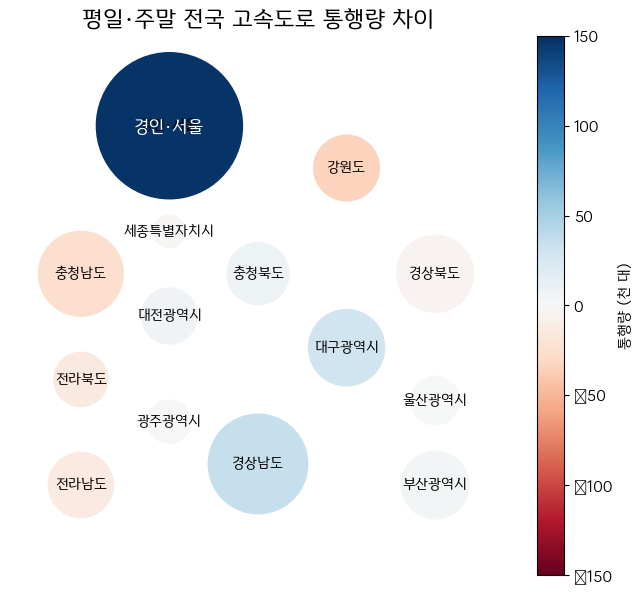

In [35]:
# draw nodes only
# their size reflects traffic difference between weekdays and weekend
fig, ax = plt.subplots(1,1,figsize=(8,7))
mpl.rcParams["font.family"] = 'Binggrae?'
cmapTraffic = plt.cm.RdBu

# network
G = nx.Graph()
G.add_nodes_from(diff['name'])
# reflect real location
pos = {'경인·서울':(250,1000),'경상남도':(350,200),'충청남도':(150,650),'충청북도':(350,650),'대전광역시':(250,550),
       '울산광역시':(550,350),'부산광역시':(550,150),'전라북도':(150,400),'전라남도':(150,150),'강원도':(450,900),
       '광주광역시':(250,300),'세종특별자치시':(250,750),'경상북도':(550,650),'대구광역시':(450,475)}
nx.draw_networkx(G, with_labels=True, pos=pos, ax=ax, font_size=10, node_size=diff['PositiveTD']/100, 
                 font_family='Binggrae?', node_color=diff['trafficDiff']/1000, cmap=cmapTraffic,  vmin=-150, vmax=150)
# add color bars
norm = mpl.colors.Normalize(vmin=-150, vmax=150)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
             ax=ax, orientation='vertical', label='통행량 (천 대)')

# add textboxes
font = {"fontname": "Binggrae?", "color": "white", "fontsize": 12, "fontweight": "extra bold"}
font2 = {"fontname": "Binggrae?", "color": "black", "fontsize": 12, "fontweight": "extra bold"}
ax.text(
    0.32,
    0.82,
    "경인·서울",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
# ax.text(
#     0.35,
#     0.01,
#     "*(평일 총 통행량) - (주말 총 통행량)",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font2,
# )

# remove the frame from the fig
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
    
plt.title('평일·주말 전국 고속도로 통행량 차이', fontsize=16)
plt.margins(0.2,0.25)
plt.show() ####### what's wrong?

In [36]:
fig.savefig('평일주말전국통행량차이.png')

C:\Users\syj43\AppData\Local\Temp\ipykernel_21184\3217902871.py:1: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Binggrae?.
  fig.savefig('평일주말전국통행량차이.png')
